In [1]:
#STANDARD IMPORT
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series,DataFrame
import xml.etree.ElementTree as et
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import requests
import io
from io import StringIO

In [2]:
#DATA URL - POPULAR BABY NAMES IN US (2011-16)
data = pd.read_csv("Popular_Baby_Names.csv")
data.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,112,2
2,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,104,3
3,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,99,4
4,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emily,99,4


In [3]:
data

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Olivia,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Chloe,112,2
2,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sophia,104,3
3,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emma,99,4
4,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Emily,99,4
5,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Mia,79,5
6,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Charlotte,59,6
7,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Sarah,57,7
8,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Isabella,56,8
9,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,Hannah,56,8


In [4]:
#CLEANING DATA BY ETHNICITY GROUP AND MERGING THEM TOGETHER
data_B = data.replace(to_replace='ASIAN AND PACI',value='ASIAN AND PACIFIC ISLANDER')
data_C = data_B.replace(to_replace='WHITE NON HISP',value='WHITE NON HISPANIC')
data_D = data_C.replace(to_replace='BLACK NON HISP',value='BLACK NON HISPANIC')

In [5]:
#CHANGING ALL CHILD FIRST NAMES TO UPPERCASE (FEW WERE IN LOWER CASE BEFORE BECAUSE OF WHICH TEH COUNT WAS REPETITIVE)
data_D["Child's First Name"] = data_D["Child's First Name"].str.upper() 
  
data_D.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,112,2
2,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,104,3
3,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,99,4
4,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,99,4


In [6]:
data_D

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,OLIVIA,172,1
1,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,112,2
2,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,104,3
3,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,EMMA,99,4
4,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,99,4
5,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,MIA,79,5
6,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,CHARLOTTE,59,6
7,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,SARAH,57,7
8,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,ISABELLA,56,8
9,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,HANNAH,56,8


In [7]:
#SORTING DATA IN ASCENDING ORDER WITH YEAR OF BIRTH SO AS TO SHORTEN IT
data_short=data_D.sort_values('Year of Birth')

In [8]:
data_short.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
19417,2011,MALE,WHITE NON HISPANIC,YEHUDAH,10,97
16824,2011,FEMALE,HISPANIC,LEYLA,10,78
16823,2011,FEMALE,HISPANIC,MARILYN,10,78
16822,2011,FEMALE,HISPANIC,JAYLYN,10,78
16821,2011,FEMALE,HISPANIC,MARISOL,10,78


In [9]:
#SEPARATING DATA FOR ALL YEARS
data_2011=data_short.loc[data_short['Year of Birth'] == 2011];
data_2012=data_short.loc[data_short['Year of Birth'] == 2012];
data_2013=data_short.loc[data_short['Year of Birth'] == 2013];
data_2014=data_short.loc[data_short['Year of Birth'] == 2014];
data_2015=data_short.loc[data_short['Year of Birth'] == 2015];
data_2016=data_short.loc[data_short['Year of Birth'] == 2016]

In [10]:
data_2011

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
19417,2011,MALE,WHITE NON HISPANIC,YEHUDAH,10,97
16824,2011,FEMALE,HISPANIC,LEYLA,10,78
16823,2011,FEMALE,HISPANIC,MARILYN,10,78
16822,2011,FEMALE,HISPANIC,JAYLYN,10,78
16821,2011,FEMALE,HISPANIC,MARISOL,10,78
16820,2011,FEMALE,HISPANIC,ISABELA,10,78
16819,2011,FEMALE,HISPANIC,ABBY,10,78
16818,2011,FEMALE,HISPANIC,NANCY,10,78
16817,2011,FEMALE,HISPANIC,NATHALIA,10,78
16816,2011,FEMALE,HISPANIC,VERONICA,10,78


In [11]:
#SORTING DATA AS PER THE RANKS FOR EACH YEAR
data_s1=data_2011.sort_values('Rank');
data_s2=data_2012.sort_values('Rank');
data_s3=data_2013.sort_values('Rank');
data_s4=data_2014.sort_values('Rank');
data_s5=data_2015.sort_values('Rank');
data_s6=data_2016.sort_values('Rank')

In [12]:
data_s1

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
18798,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1
16838,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
18214,2011,MALE,HISPANIC,JAYDEN,426,1
18797,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1
17516,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
17515,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
17817,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1
16194,2011,FEMALE,HISPANIC,ISABELLA,331,1
16193,2011,FEMALE,HISPANIC,ISABELLA,331,1
17818,2011,MALE,BLACK NON HISPANIC,JAYDEN,184,1


In [13]:
#AS WE SEE IN THE ABOVE TABLE, A LOT OF NAMES ARE REPEATING TWICE
#THE FOLLOWING CODE IS WRITTEN TO REMOVE THE DUPLICATE DATA AND GET A NEW SORTED LIST
data_o1 = data_s1.sort_values("Child's First Name")
data_o1 = data_s1.drop_duplicates(subset="Child's First Name", keep='first');
data_o2 = data_s2.sort_values("Child's First Name")
data_o2 = data_s2.drop_duplicates(subset="Child's First Name", keep='first');
data_o3 = data_s3.sort_values("Child's First Name")
data_o3 = data_s3.drop_duplicates(subset="Child's First Name", keep='first');
data_o4 = data_s4.sort_values("Child's First Name")
data_o4 = data_s4.drop_duplicates(subset="Child's First Name", keep='first');
data_o5 = data_s5.sort_values("Child's First Name")
data_o5 = data_s5.drop_duplicates(subset="Child's First Name", keep='first');
data_o6 = data_s6.sort_values("Child's First Name")
data_o6 = data_s6.drop_duplicates(subset="Child's First Name", keep='first')

In [14]:
data_o1.head()

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
18798,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1
16838,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
18214,2011,MALE,HISPANIC,JAYDEN,426,1
17516,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
16194,2011,FEMALE,HISPANIC,ISABELLA,331,1


In [15]:
#FINAL SORTING FOR THE DATASET WITH ETHNICITIES AND RANKS
data_nf1 = data_o1.sort_values(['Ethnicity','Rank']);
data_nf2 = data_o2.sort_values(['Ethnicity','Rank']);
data_nf3 = data_o3.sort_values(['Ethnicity','Rank']);
data_nf4 = data_o4.sort_values(['Ethnicity','Rank']);
data_nf5 = data_o5.sort_values(['Ethnicity','Rank']);
data_nf6 = data_o6.sort_values(['Ethnicity','Rank'])

In [16]:
#LISTING AND CONCATENATING THE CODE ABOVE TO GENERATE FINAL DATASET TABLE
Baby_Group = [data_nf1,data_nf2,data_nf3,data_nf4,data_nf5,data_nf6]
Baby = pd.concat(Baby_Group)

In [17]:
#TO RESET THE INDEX OF THE ENTIRE DATASET
Final_Baby = Baby.reset_index(drop = True)

In [18]:
#PRINTING THE FINAL DATASET (AFTER CULLING ALL REPETITIVE DATA )
Final_Baby 

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
4,2011,MALE,ASIAN AND PACIFIC ISLANDER,RYAN,150,3
5,2011,MALE,ASIAN AND PACIFIC ISLANDER,LUCAS,103,5
6,2011,MALE,ASIAN AND PACIFIC ISLANDER,JASON,98,6
7,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,TIFFANY,54,7
8,2011,MALE,ASIAN AND PACIFIC ISLANDER,KEVIN,92,8
9,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,FIONA,48,9


Text(0.5, 1, 'Year of Birth v/s Count')

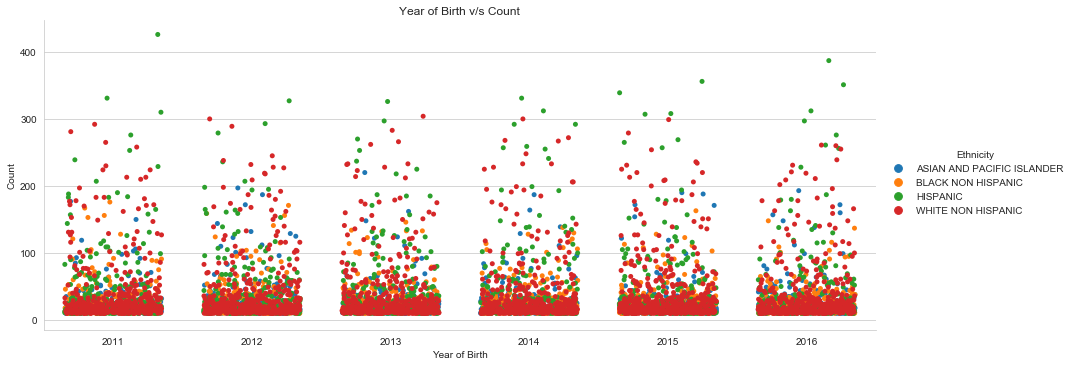

In [19]:
#VISUALISATION OF THE COUNT OF EACH AND EVERY NAME THAT EXISTS IN DATA SET FOR EVERY YEAR
sns.catplot(x='Year of Birth',y='Count',hue='Ethnicity',data=Final_Baby,aspect=2.5,jitter=0.35)
plt.title('Year of Birth v/s Count')
#the most popular or common name occured in 2011

In [20]:
#EXPORTING A NEW CSV FILE FOR THE ABOVE GENERATED DATASET
Final_Baby.to_csv('Final_Baby.csv')

In [21]:
#RETRIEVING ALL THE FIRST RANKERS IN ALL YEARS AND AMONGST ALL ETHNICITY GROUPS
Final_Baby_Rank = Final_Baby.groupby('Rank')
Final_Baby_Rank.get_group(1)

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
205,2011,FEMALE,BLACK NON HISPANIC,MADISON,176,1
468,2011,MALE,HISPANIC,JAYDEN,426,1
469,2011,FEMALE,HISPANIC,ISABELLA,331,1
794,2011,MALE,WHITE NON HISPANIC,MICHAEL,292,1
795,2011,FEMALE,WHITE NON HISPANIC,ESTHER,224,1
1206,2012,MALE,ASIAN AND PACIFIC ISLANDER,RYAN,197,1
1207,2012,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,172,1
1447,2012,MALE,BLACK NON HISPANIC,JAYDEN,171,1


<function matplotlib.pyplot.show(*args, **kw)>

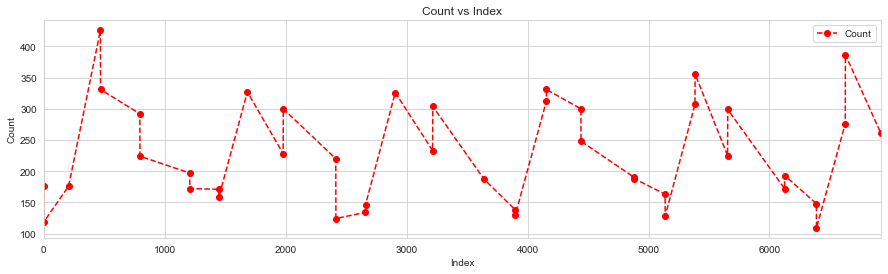

In [22]:
#LET'S PLOT THE COUNT OF ALL RANK-1 IN THE DATASET
Final_Baby_Rank.get_group(1).plot(y="Count",figsize=(15,4),legend=True,color='red',marker='o',linestyle='--')
#x-axis has index number & the highest dot shows count=426 for name Jayden (have verified it manually)
plt.title('Count vs Index')
plt.xlabel('Index')
plt.ylabel('Count')
plt.show

In [23]:
#CALCULATING TOTAL BIRTH COUNT IN THE ENTIRE DATASET
Total = Final_Baby['Count'].sum()
print(Total)

243357


In [24]:
#RETRIEVING THE DATASET FOR ALL MALE BABIES
Final_Baby_Gender = Final_Baby.groupby('Gender')
Final_Baby_Gender.groups
data_m=Final_Baby_Gender.get_group('MALE')
data_m

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
4,2011,MALE,ASIAN AND PACIFIC ISLANDER,RYAN,150,3
5,2011,MALE,ASIAN AND PACIFIC ISLANDER,LUCAS,103,5
6,2011,MALE,ASIAN AND PACIFIC ISLANDER,JASON,98,6
8,2011,MALE,ASIAN AND PACIFIC ISLANDER,KEVIN,92,8
10,2011,MALE,ASIAN AND PACIFIC ISLANDER,ERIC,85,9
13,2011,MALE,ASIAN AND PACIFIC ISLANDER,MUHAMMAD,76,11
15,2011,MALE,ASIAN AND PACIFIC ISLANDER,VINCENT,71,13
17,2011,MALE,ASIAN AND PACIFIC ISLANDER,ANDREW,70,14
19,2011,MALE,ASIAN AND PACIFIC ISLANDER,IVAN,66,15


In [25]:
#RETRIEVING THE DATASET FOR ALL FEMALE BABIES
data_f=Final_Baby_Gender.get_group('FEMALE')
data_f

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
1,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,SOPHIA,119,1
2,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,CHLOE,106,2
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
7,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,TIFFANY,54,7
9,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,FIONA,48,9
11,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,ANGELA,47,10
12,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,VIVIAN,44,11
14,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,MICHELLE,42,12
16,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,JOANNA,38,13
18,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,IVY,35,15


In [26]:
#TO VISUALISE DATA FOR MALE CHILD BIRTH AND MALE POPULATION GROWTH
#FINDING THE DATA WITH RESPECT TO THEIR YEAR OF BIRTH FOR MALE CHILDREN
data_m2011=data_m.loc[data_m['Year of Birth'] == 2011];
data_m2012=data_m.loc[data_m['Year of Birth'] == 2012];
data_m2013=data_m.loc[data_m['Year of Birth'] == 2013];
data_m2014=data_m.loc[data_m['Year of Birth'] == 2014];
data_m2015=data_m.loc[data_m['Year of Birth'] == 2015];
data_m2016=data_m.loc[data_m['Year of Birth'] == 2016]

In [27]:
#FINDING THE ABOVE VALUE WITH RESPECT OF ETHNCITY GROUP 
data_m2011Asian=data_m2011.loc[data_m['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_m2011BNH=data_m2011.loc[data_m['Ethnicity'] == 'BLACK NON HISPANIC'];
data_m2011H=data_m2011.loc[data_m['Ethnicity'] == 'HISPANIC'];
data_m2011WNH=data_m2011.loc[data_m['Ethnicity'] == 'WHITE NON HISPANIC'];

data_m2012Asian=data_m2012.loc[data_m['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_m2012BNH=data_m2012.loc[data_m['Ethnicity'] == 'BLACK NON HISPANIC'];
data_m2012H=data_m2012.loc[data_m['Ethnicity'] == 'HISPANIC'];
data_m2012WNH=data_m2012.loc[data_m['Ethnicity'] == 'WHITE NON HISPANIC'];

data_m2013Asian=data_m2013.loc[data_m['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_m2013BNH=data_m2013.loc[data_m['Ethnicity'] == 'BLACK NON HISPANIC'];
data_m2013H=data_m2013.loc[data_m['Ethnicity'] == 'HISPANIC'];
data_m2013WNH=data_m2013.loc[data_m['Ethnicity'] == 'WHITE NON HISPANIC'];

data_m2014Asian=data_m2014.loc[data_m['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_m2014BNH=data_m2014.loc[data_m['Ethnicity'] == 'BLACK NON HISPANIC'];
data_m2014H=data_m2014.loc[data_m['Ethnicity'] == 'HISPANIC'];
data_m2014WNH=data_m2014.loc[data_m['Ethnicity'] == 'WHITE NON HISPANIC'];

data_m2015Asian=data_m2015.loc[data_m['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_m2015BNH=data_m2015.loc[data_m['Ethnicity'] == 'BLACK NON HISPANIC'];
data_m2015H=data_m2015.loc[data_m['Ethnicity'] == 'HISPANIC'];
data_m2015WNH=data_m2015.loc[data_m['Ethnicity'] == 'WHITE NON HISPANIC'];

data_m2016Asian=data_m2016.loc[data_m['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_m2016BNH=data_m2016.loc[data_m['Ethnicity'] == 'BLACK NON HISPANIC'];
data_m2016H=data_m2016.loc[data_m['Ethnicity'] == 'HISPANIC'];
data_m2016WNH=data_m2016.loc[data_m['Ethnicity'] == 'WHITE NON HISPANIC'];

In [28]:
#SUMMATION OF ALL COUNT VALUES FOR MALE CHILD EVERY YEAR FOR EACH ETHNIC GROUP
Total_m11Asian =data_m2011Asian['Count'].sum();
Total_m11BNH =data_m2011BNH['Count'].sum();
Total_m11H =data_m2011H['Count'].sum();
Total_m11WNH =data_m2011WNH['Count'].sum();

Total_m12Asian =data_m2012Asian['Count'].sum();
Total_m12BNH =data_m2012BNH['Count'].sum();
Total_m12H =data_m2012H['Count'].sum();
Total_m12WNH =data_m2012WNH['Count'].sum();

Total_m13Asian =data_m2013Asian['Count'].sum();
Total_m13BNH =data_m2013BNH['Count'].sum();
Total_m13H =data_m2013H['Count'].sum();
Total_m13WNH =data_m2013WNH['Count'].sum();

Total_m14Asian =data_m2014Asian['Count'].sum();
Total_m14BNH =data_m2014BNH['Count'].sum();
Total_m14H =data_m2014H['Count'].sum();
Total_m14WNH =data_m2014WNH['Count'].sum();

Total_m15Asian =data_m2015Asian['Count'].sum();
Total_m15BNH =data_m2015BNH['Count'].sum();
Total_m15H =data_m2015H['Count'].sum();
Total_m15WNH =data_m2015WNH['Count'].sum();

Total_m16Asian =data_m2016Asian['Count'].sum();
Total_m16BNH =data_m2016BNH['Count'].sum();
Total_m16H =data_m2016H['Count'].sum();
Total_m16WNH =data_m2016WNH['Count'].sum();

In [29]:
#GENERATING A LIST OF NEW COUNT VALUES
data_m_split = [['2011', Total_m11Asian, Total_m11BNH, Total_m11H, Total_m11WNH], 
                   ['2012', Total_m12Asian, Total_m12BNH, Total_m12H, Total_m12WNH],
                   ['2013', Total_m13Asian, Total_m13BNH, Total_m13H, Total_m13WNH],
                   ['2014', Total_m14Asian, Total_m14BNH, Total_m14H, Total_m14WNH],
                   ['2015', Total_m15Asian, Total_m15BNH, Total_m15H, Total_m15WNH],
                   ['2016', Total_m16Asian, Total_m16BNH, Total_m16H, Total_m16WNH]]

In [30]:
#CREATING A NEW DATA FRAME TO GET THE COUNT VALUES AS YEAR x ETHNICITY GROUP
data_m_total = pd.DataFrame(data_m_split, columns = ['Year', 'Asian', 'Black_Non_Hispanic', 'Hispanic', 'White_Non_Hispanic'])
data_m_total

,Year,Asian,Black_Non_Hispanic,Hispanic,White_Non_Hispanic
0,2011,2825,3696,6714,8913
1,2012,3685,3797,5678,9144
2,2013,3217,3750,6147,8762
3,2014,3555,3770,5781,8737
4,2015,3532,3329,5547,9804
5,2016,3768,3446,5588,9175


In [31]:
#TO VISUALISE DATA FOR FEMALE CHILD BIRTH AND FEMALE POPULATION GROWTH
#REPEATING THE DATA ABOVE AS DONE FOR MALE CHILDREN
data_f2011=data_f.loc[data_f['Year of Birth'] == 2011];
data_f2012=data_f.loc[data_f['Year of Birth'] == 2012];
data_f2013=data_f.loc[data_f['Year of Birth'] == 2013];
data_f2014=data_f.loc[data_f['Year of Birth'] == 2014];
data_f2015=data_f.loc[data_f['Year of Birth'] == 2015];
data_f2016=data_f.loc[data_f['Year of Birth'] == 2016]

In [32]:
data_f2011Asian=data_f2011.loc[data_f['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_f2011BNH=data_f2011.loc[data_f['Ethnicity'] == 'BLACK NON HISPANIC'];
data_f2011H=data_f2011.loc[data_f['Ethnicity'] == 'HISPANIC'];
data_f2011WNH=data_f2011.loc[data_f['Ethnicity'] == 'WHITE NON HISPANIC'];

data_f2012Asian=data_f2012.loc[data_f['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_f2012BNH=data_f2012.loc[data_f['Ethnicity'] == 'BLACK NON HISPANIC'];
data_f2012H=data_f2012.loc[data_f['Ethnicity'] == 'HISPANIC'];
data_f2012WNH=data_f2012.loc[data_f['Ethnicity'] == 'WHITE NON HISPANIC'];

data_f2013Asian=data_f2013.loc[data_f['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_f2013BNH=data_f2013.loc[data_f['Ethnicity'] == 'BLACK NON HISPANIC'];
data_f2013H=data_f2013.loc[data_f['Ethnicity'] == 'HISPANIC'];
data_f2013WNH=data_f2013.loc[data_f['Ethnicity'] == 'WHITE NON HISPANIC'];

data_f2014Asian=data_f2014.loc[data_f['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_f2014BNH=data_f2014.loc[data_f['Ethnicity'] == 'BLACK NON HISPANIC'];
data_f2014H=data_f2014.loc[data_f['Ethnicity'] == 'HISPANIC'];
data_f2014WNH=data_f2014.loc[data_f['Ethnicity'] == 'WHITE NON HISPANIC'];

data_f2015Asian=data_f2015.loc[data_f['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_f2015BNH=data_f2015.loc[data_f['Ethnicity'] == 'BLACK NON HISPANIC'];
data_f2015H=data_f2015.loc[data_f['Ethnicity'] == 'HISPANIC'];
data_f2015WNH=data_f2015.loc[data_f['Ethnicity'] == 'WHITE NON HISPANIC'];

data_f2016Asian=data_f2016.loc[data_f['Ethnicity'] == 'ASIAN AND PACIFIC ISLANDER'];
data_f2016BNH=data_f2016.loc[data_f['Ethnicity'] == 'BLACK NON HISPANIC'];
data_f2016H=data_f2016.loc[data_f['Ethnicity'] == 'HISPANIC'];
data_f2016WNH=data_f2016.loc[data_f['Ethnicity'] == 'WHITE NON HISPANIC'];

In [33]:
Total_f11Asian =data_f2011Asian['Count'].sum();
Total_f11BNH =data_f2011BNH['Count'].sum();
Total_f11H =data_f2011H['Count'].sum();
Total_f11WNH =data_f2011WNH['Count'].sum();

Total_f12Asian =data_f2012Asian['Count'].sum();
Total_f12BNH =data_f2012BNH['Count'].sum();
Total_f12H =data_f2012H['Count'].sum();
Total_f12WNH =data_f2012WNH['Count'].sum();

Total_f13Asian =data_f2013Asian['Count'].sum();
Total_f13BNH =data_f2013BNH['Count'].sum();
Total_f13H =data_f2013H['Count'].sum();
Total_f13WNH =data_f2013WNH['Count'].sum();

Total_f14Asian =data_f2014Asian['Count'].sum();
Total_f14BNH =data_f2014BNH['Count'].sum();
Total_f14H =data_f2014H['Count'].sum();
Total_f14WNH =data_f2014WNH['Count'].sum();

Total_f15Asian =data_f2015Asian['Count'].sum();
Total_f15BNH =data_f2015BNH['Count'].sum();
Total_f15H =data_f2015H['Count'].sum();
Total_f15WNH =data_f2015WNH['Count'].sum();

Total_f16Asian =data_f2016Asian['Count'].sum();
Total_f16BNH =data_f2016BNH['Count'].sum();
Total_f16H =data_f2016H['Count'].sum();
Total_f16WNH =data_f2016WNH['Count'].sum();

In [34]:
data_f_split = [['2011', Total_f11Asian, Total_f11BNH, Total_f11H, Total_f11WNH], 
                   ['2012', Total_f12Asian, Total_f12BNH, Total_f12H, Total_f12WNH],
                   ['2013', Total_f13Asian, Total_f13BNH, Total_f13H, Total_f13WNH],
                   ['2014', Total_f14Asian, Total_f14BNH, Total_f14H, Total_f14WNH],
                   ['2015', Total_f15Asian, Total_f15BNH, Total_f15H, Total_f15WNH],
                   ['2016', Total_f16Asian, Total_f16BNH, Total_f16H, Total_f16WNH]]

In [35]:
data_f_total = pd.DataFrame(data_f_split, columns = ['Year', 'Asian', 'Black_Non_Hispanic', 'Hispanic', 'White_Non_Hispanic'])
data_f_total

,Year,Asian,Black_Non_Hispanic,Hispanic,White_Non_Hispanic
0,2011,2431,3390,5667,7005
1,2012,3171,3121,5196,7324
2,2013,2818,3167,4998,7322
3,2014,2967,3289,5262,7062
4,2015,2784,3205,5008,7781
5,2016,3110,2954,5099,6866


Text(0.5, 1.0, 'Female Child Birth Count')

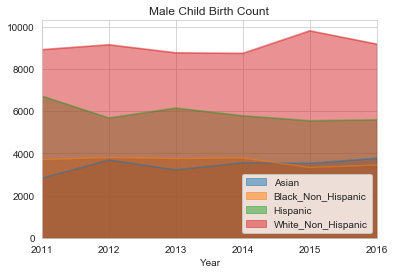

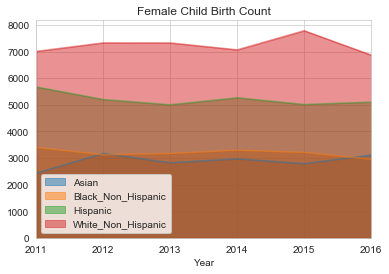

In [36]:
#STACKING THE CHILD BIRTH COUNT (SEPARATELY) FOR MALE & FEMALE FROM 2011-16
Stack_plot_m = data_m_total.plot.area(x='Year', stacked=False)
plt.title('Male Child Birth Count')
Stack_plot_f = data_f_total.plot.area(x='Year', stacked=False)
plt.title('Female Child Birth Count')

In [37]:
#OBSERVATION
#In the Unstacked Graphs above, for Birth Counts
#>>the mean heirarchy of child birth for both Males & Females was Asians<Black-non-Hispanic<Hispanic<White-non-Hispanic
#>>the birth counts amongst Asians and Black-non-Hispanics shared nearly the same average
#>>the Male Birth count touched almost 10,000 for Asians (largest amongst the group)
#>>whereas, the Female Birth count remained a little below 8,000 (largest amongst the group)

In [38]:
#TO VISUALISE TOTAL POPULATION GROWTH FROM YEAR 2011 TO 2016
data_total = data_m_total + data_f_total
data_total['Year'] = ['2011', '2012', '2013', '2014', '2015', '2016']
data_total

,Year,Asian,Black_Non_Hispanic,Hispanic,White_Non_Hispanic
0,2011,5256,7086,12381,15918
1,2012,6856,6918,10874,16468
2,2013,6035,6917,11145,16084
3,2014,6522,7059,11043,15799
4,2015,6316,6534,10555,17585
5,2016,6878,6400,10687,16041


In [39]:
#BELOW IS THE TABLE FOR CUMULATIVE INCREASE IN POPULATION GROWTH PER YEAR AND WITH EVERY ETHNICITY GROUP
data_cum = data_total.cumsum()
data_cum['Year'] = ['2011', '2012', '2013', '2014', '2015', '2016']
data_cum

,Year,Asian,Black_Non_Hispanic,Hispanic,White_Non_Hispanic
0,2011,5256,7086,12381,15918
1,2012,12112,14004,23255,32386
2,2013,18147,20921,34400,48470
3,2014,24669,27980,45443,64269
4,2015,30985,34514,55998,81854
5,2016,37863,40914,66685,97895


Text(0.5, 1.0, 'Population Growth During 2011 to 2016 by Ethnicity')

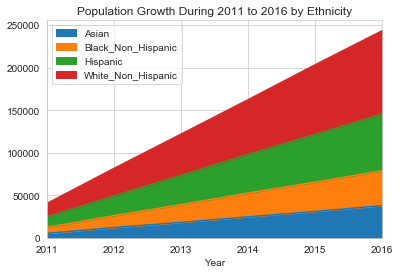

In [40]:
#PLOTTING THE DATA FOR POPULATION GROWTH OVER THE PERIOD OF 6 YEARS
Stack_plot = data_cum.plot.area(x='Year', stacked=True)
plt.title('Population Growth During 2011 to 2016 by Ethnicity')

In [41]:
#RETRIEVING THE POPULATION GROWTH FOR ALL MALE CHILDREN
data_m_cum = data_m_total.cumsum()
data_m_cum['Year'] = ['2011', '2012', '2013', '2014', '2015', '2016']
data_m_cum

,Year,Asian,Black_Non_Hispanic,Hispanic,White_Non_Hispanic
0,2011,2825,3696,6714,8913
1,2012,6510,7493,12392,18057
2,2013,9727,11243,18539,26819
3,2014,13282,15013,24320,35556
4,2015,16814,18342,29867,45360
5,2016,20582,21788,35455,54535


In [42]:
#RETRIEVING THE POPULATION GROWTH FOR ALL FEMALE CHILDREN
data_f_cum = data_f_total.cumsum()
data_f_cum['Year'] = ['2011', '2012', '2013', '2014', '2015', '2016']
data_f_cum

,Year,Asian,Black_Non_Hispanic,Hispanic,White_Non_Hispanic
0,2011,2431,3390,5667,7005
1,2012,5602,6511,10863,14329
2,2013,8420,9678,15861,21651
3,2014,11387,12967,21123,28713
4,2015,14171,16172,26131,36494
5,2016,17281,19126,31230,43360


Text(0.5, 1.0, 'Female Child Population Growth')

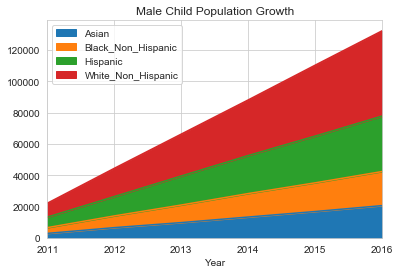

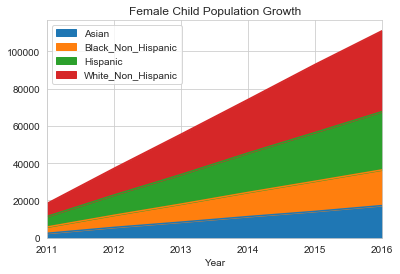

In [43]:
#STACKING THE POPULATION GROWTH (SEPARATELY) FOR MALE & FEMALE CHILDS FROM 2011-16
Stack_plot_m = data_m_cum.plot.area(x='Year', stacked=True)
plt.title('Male Child Population Growth')
Stack_plot_f = data_f_cum.plot.area(x='Year', stacked=True)
plt.title('Female Child Population Growth')

<function matplotlib.pyplot.show(*args, **kw)>

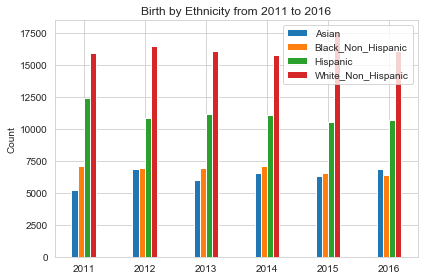

In [44]:
#PLOTTING A BAR CHART FOR BIRTH COUNT OVER THE 6 YEARS OF ALL ETHNICITY GROUPS SEPARATELY
Year = data_total['Year']
Asian = data_total['Asian']
Black_Non_Hispanic = data_total['Black_Non_Hispanic']
Hispanic = data_total['Hispanic']
White_Non_Hispanic = data_total['White_Non_Hispanic']

x = np.arange(len(Year))
width = 0.1

fig,ax = plt.subplots()
bar1 = ax.bar(x - 3*width/2,Asian,width,label = 'Asian')
bar2 = ax.bar(x - width/2,Black_Non_Hispanic,width,label = 'Black_Non_Hispanic')
bar3 = ax.bar(x + width/2,Hispanic,width,label = 'Hispanic')
bar4 = ax.bar(x + 3*width/2,White_Non_Hispanic,width,label = 'White_Non_Hispanic')

ax.set_ylabel('Count')
ax.set_title('Birth by Ethnicity from 2011 to 2016')
ax.set_xticks(x)
ax.set_xticklabels(Year)
ax.legend()

fig.tight_layout()
plt.show

In [45]:
#OBSERVATION
#After Consolidating all Ethnicity Groups, 
#>>it's very clear that heirarchy of child births was as follows throughout, till 2015- 
#Asians < Black-non-Hispanic < Hispanic < White-non-Hispanic
#>>In 2016, Asians managed to beat Black-Non-Hispanics by a bit
#>>Hispanics reduced in numbers
#>>White-Non-Hispanics, always leading, reflected the maximum child births in 2015

In [46]:
#LET'S ADD UP ALL THE NUMBERS FOR EACH GENDER FOR EVERY YEAR
Total_11m =data_m2011['Count'].sum();
Total_12m =data_m2012['Count'].sum();
Total_13m =data_m2013['Count'].sum();
Total_14m =data_m2014['Count'].sum();
Total_15m =data_m2015['Count'].sum();
Total_16m =data_m2016['Count'].sum();

Total_11f =data_f2011['Count'].sum();
Total_12f =data_f2012['Count'].sum();
Total_13f =data_f2013['Count'].sum();
Total_14f =data_f2014['Count'].sum();
Total_15f =data_f2015['Count'].sum();
Total_16f =data_f2016['Count'].sum();

In [47]:
data_male_growth = [['2011', Total_11m], 
                   ['2012', Total_12m],
                   ['2013', Total_13m],
                   ['2014', Total_14m],
                   ['2015', Total_15m],
                   ['2016', Total_16m]];
data_female_growth = [['2011', Total_11f], 
                   ['2012', Total_12f],
                   ['2013', Total_13f],
                   ['2014', Total_14f],
                   ['2015', Total_15f],
                   ['2016', Total_16f]]

In [48]:
data_male_total = pd.DataFrame(data_male_growth, columns = ['Year', 'Male Count'])
data_male_total

,Year,Male Count
0,2011,22148
1,2012,22304
2,2013,21876
3,2014,21843
4,2015,22212
5,2016,21977


In [49]:
data_female_total = pd.DataFrame(data_female_growth, columns = ['Year', 'Female Count'])
data_female_total

,Year,Female Count
0,2011,18493
1,2012,18812
2,2013,18305
3,2014,18580
4,2015,18778
5,2016,18029


In [50]:
#Merging Data for both Genders in one single dataset
data_total_growth = pd.merge(data_male_total,data_female_total)
data_total_growth

,Year,Male Count,Female Count
0,2011,22148,18493
1,2012,22304,18812
2,2013,21876,18305
3,2014,21843,18580
4,2015,22212,18778
5,2016,21977,18029


Text(0.5, 1.0, 'Year V/S Count w.r.t Gender')

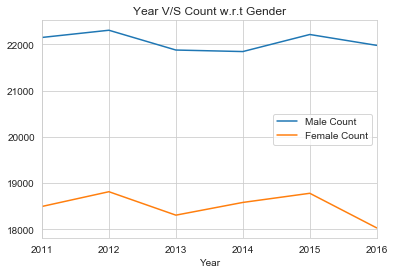

In [51]:
#PLOTTING GRAPH FOR POPULATION GROWHT OF EACH GENDER, CUMULATIVE OF ALL ETHICITIES OVER THE YEARS
data_total_growth.plot.line(x='Year')
plt.title('Year V/S Count w.r.t Gender')

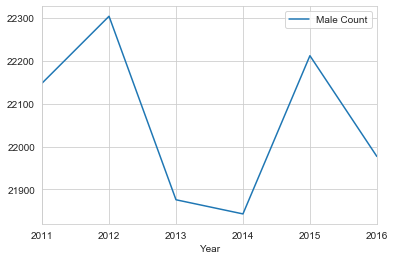

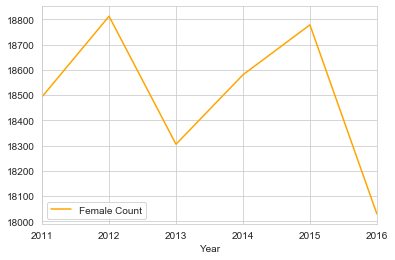

In [52]:
#NOW LET'S PLOT THE GRAPHS SEPARATELY FOR EACH GENDER AS WELL
male_child_graph = data_male_total.plot.line(x='Year', y='Male Count')
female_child_graph = data_female_total.plot.line(x='Year', y='Female Count',color='orange')

In [53]:
#LET'S VISUALISE SOME DATA FOR ANY RANDOM NAME FROM DATASET - TO CHECK IT'S POPULARITY OVER THE YEARS
Baby_Name='ETHAN'
N1=data_m.loc[data_m["Child's First Name"] == Baby_Name]
N1

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,177,1
1209,2012,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,187,2
2660,2013,MALE,BLACK NON HISPANIC,ETHAN,146,1
3898,2014,MALE,BLACK NON HISPANIC,ETHAN,138,1
4884,2015,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,172,2
6126,2016,MALE,ASIAN AND PACIFIC ISLANDER,ETHAN,193,1


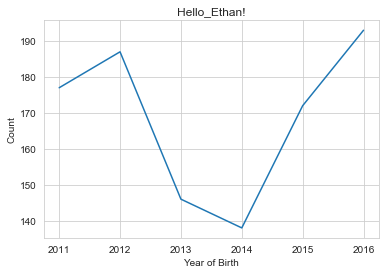

In [54]:
Baby_chart = sns.lineplot(x="Year of Birth",
                         y="Count",
                         data=N1,
                         ).set_title('Hello_Ethan!')

plt.show()

In [55]:
#LET'S ADD ONE FEMALE NAME TO THE ABOVE VISUALISATION
Baby_Name1=['EMILY']
N2=data_f.loc[data_f["Child's First Name"] == 'EMILY']
N2

,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
3,2011,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,93,3
1212,2012,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,110,4
2418,2013,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,92,4
3646,2014,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,92,4
4888,2015,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,99,4
6131,2016,FEMALE,ASIAN AND PACIFIC ISLANDER,EMILY,99,4


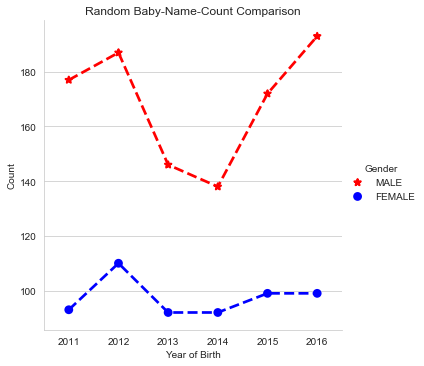

In [56]:
Random_Baby_Group = [N1,N2]
Random_Baby = pd.concat(Random_Baby_Group)
#PLOTTING A COMPARISON BETWEEN COUNT VALUE OF ANY RANDOM MALE NAME & A FEMALE NAME
sns.catplot(x="Year of Birth", y="Count", hue="Gender",palette={"MALE": "r", "FEMALE": "b"},
            markers=["*", "o"], linestyles=["--", "--"],
            kind="point", data=Random_Baby);
plt.title('Random Baby-Name-Count Comparison')
plt.show()

In [57]:
#SIMILARLY WE CAN PICK ANY NAME OR ADD MORE NAMES TO THE LIST AND PLOT MORE GRAPHS